In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
data['Gender'] = data['Gender'].map(
    {'Male': 1, 'Female': 0}
    )

In [8]:
print(data['Gender'])

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64


In [9]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

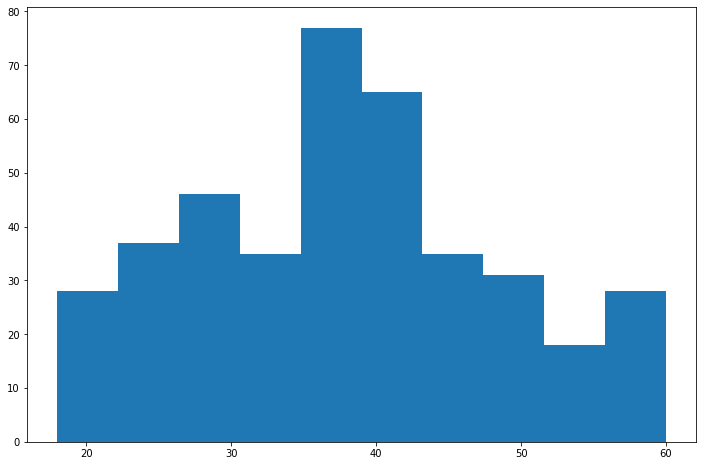

In [10]:
plt.figure(figsize=(12, 8))
plt.hist(data['Age'])

(array([257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

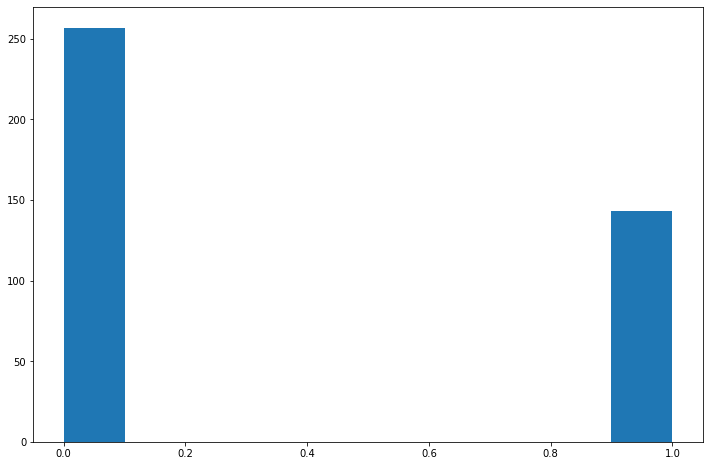

In [11]:
plt.figure(figsize=(12, 8))
plt.hist(data['Purchased'])

(array([204.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 196.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

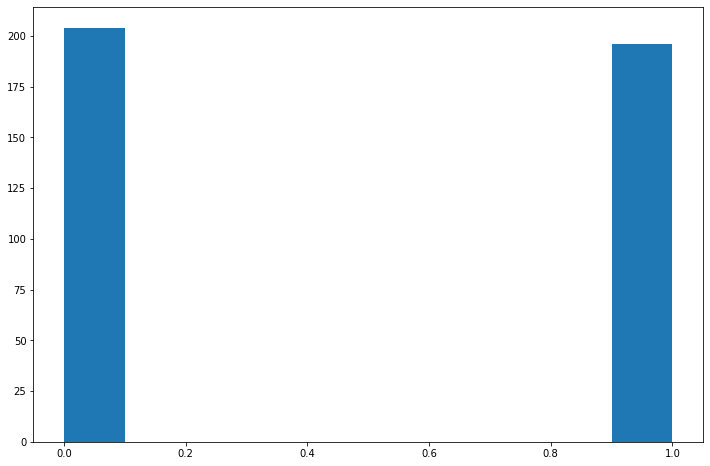

In [12]:
plt.figure(figsize=(12, 8))
plt.hist(data['Gender'])

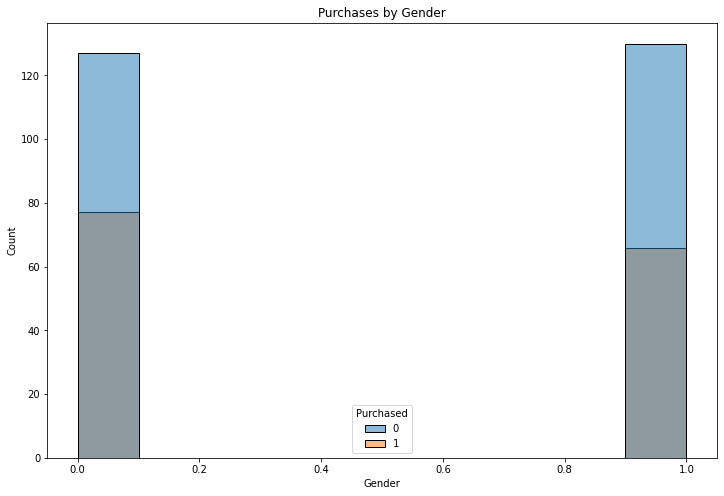

In [13]:
plt.figure(figsize=(12, 8))
plt.title("Purchases by Gender")
sns.histplot(x="Gender", hue="Purchased", data=data)
plt.show()

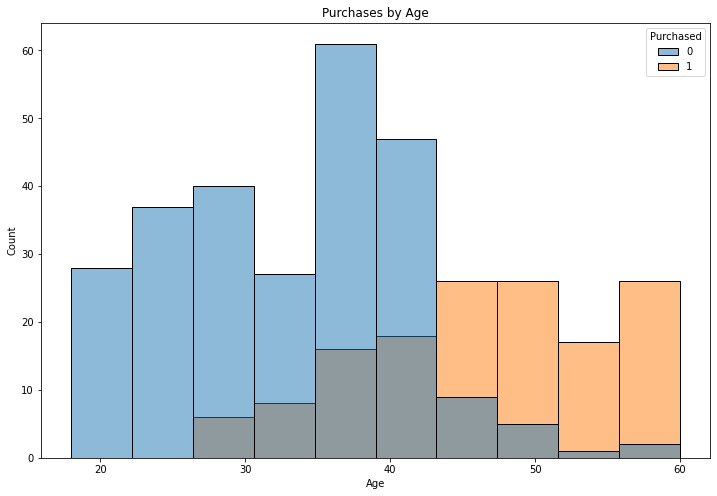

In [14]:
plt.figure(figsize=(12, 8))
plt.title("Purchases by Age")
sns.histplot(x="Age", hue="Purchased", data=data)
plt.show()

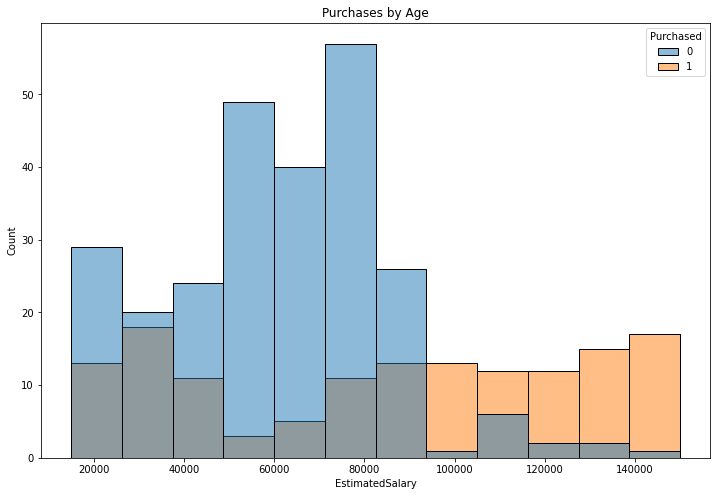

In [15]:
plt.figure(figsize=(12, 8))
plt.title("Purchases by Age")
sns.histplot(x= "EstimatedSalary", hue="Purchased", data=data)
plt.show()

In [16]:
px.scatter(data, x = 'Purchased', y = 'EstimatedSalary', color = 'Purchased', height = 500, width = 600)

In [17]:
px.scatter(data, x = 'Gender', y = 'EstimatedSalary', color = 'Gender', height = 500, width = 600)

In [18]:
x = np.array(data[["Age", "EstimatedSalary", 'Gender']])
y = np.array(data[["Purchased"]])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        66
           1       0.90      0.76      0.83        34

    accuracy                           0.89       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.89      0.89      0.89       100

